# Renderers

This test showcases rendering with various renderer approaches.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lmenv
env = lmenv.load('.lmenv')

In [3]:
import os
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import lightmetrica as lm
%load_ext lightmetrica_jupyter
import lmscene

In [4]:
lm.init()
lm.log.init('jupyter')
lm.progress.init('jupyter')
lm.info()
lm.comp.load_plugin(os.path.join(env.bin_path, 'accel_embree'))
if not lm.Release:
    lm.parallel.init('openmp', num_threads=1)
    lm.debug.attach_to_debugger()

[I|0.000] Lightmetrica -- Version 3.0.0 (rev. 70601db) Linux x64
[I|0.000] Loading plugin [name='accel_embree']
[I|0.001] .. Successfully loaded [name='accel_embree']


In [5]:
def render(scene, name, **kwargs):
    w = 854
    h = 480
    film = lm.load_film('film', 'bitmap', w=w, h=h)
    renderer = lm.load_renderer('renderer', name,
        scene=scene,
        output=film,
        max_verts=10,
        scheduler='time',
        render_time=30,
        **kwargs)
    renderer.render()
    return np.copy(film.buffer())

def display_image(img, fig_size=15, scale=1):
    f = plt.figure(figsize=(fig_size,fig_size))
    ax = f.add_subplot(111)                                                                                                                                                
    ax.imshow(np.clip(np.power(img*scale,1/2.2),0,1), origin='lower')
    ax.axis('off')
    plt.show()

## Scene setup

In [6]:
# Create scene
accel = lm.load_accel('accel', 'embree')
scene = lm.load_scene('scene', 'default', accel=accel)
lmscene.cornell_box_sphere(scene, env.scene_path)
scene.build()

[I|0.034] Loading asset [name='accel']
[I|0.035] .. {"intcost":1.0,"maxBranchingFactor":2,"maxDepth":18,"maxLeafSize":32,"minLeafSize":1,"quality":1,"sahBlockSize":1,"travcost":1.0}
[I|0.035] .. {"compact":false,"dynamic":false,"filter":false,"robust":false}
[I|0.035] Loading asset [name='scene']
[I|0.035] Loading asset [name='camera_main']
[I|0.035] Loading asset [name='model_obj']
[I|0.036] .. Loading OBJ file [path='CornellBox-Sphere.obj']
[I|0.036] .. Loading MTL file [path='CornellBox-Sphere.mtl']
[I|0.038] Building acceleration structure [name='accel']
[I|0.038] .. Flattening scene
[I|0.039] .. Building


## Rendering

### Path tracing (naive)

`renderer::pt` with `sampling_mode = naive`. For comparison, the primary rays are sampling from the entire image (`primary_ray_sampling_mode = image`).

[I|0.058] Loading asset [name='film']
[I|0.074] Loading asset [name='renderer']


  0%|          | 0/30.0 [00:00<?, ?it/s]

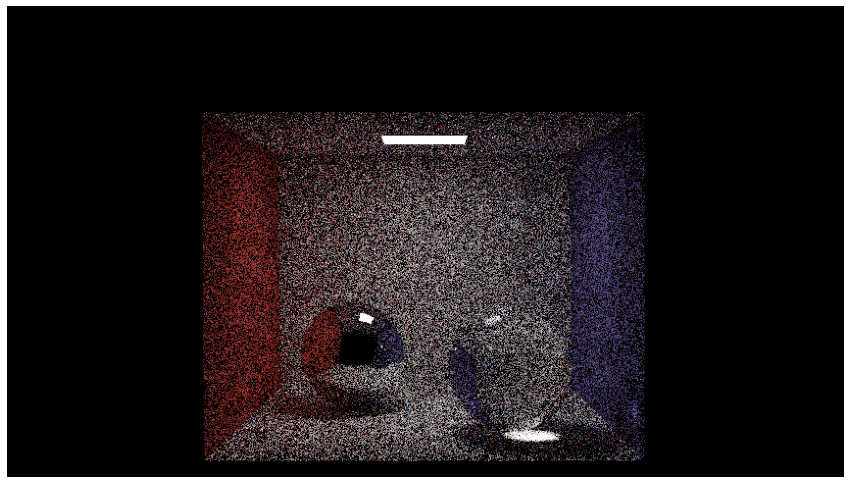

In [7]:
img = render(scene, 'pt',
    sampling_mode='naive',
    primary_ray_sampling_mode='image')
display_image(img)

### Path tracing (next event estimation)

`renderer::pt` with `sampling_mode = nee`

[I|30.642] Loading asset [name='film']
[I|30.643] .. Asset [name='film'] has been already loaded. Replacing..
[I|30.659] Loading asset [name='renderer']
[I|30.659] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

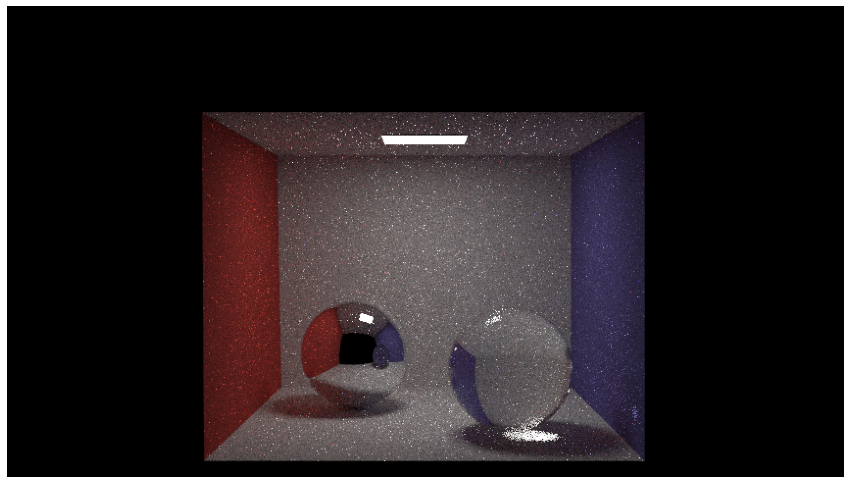

In [8]:
img = render(scene, 'pt',
    sampling_mode='nee',
    primary_ray_sampling_mode='image')
display_image(img)

### Path tracing (multiple importance sampling)

`renderer::pt` with `sampling_mode = mis`

[I|61.301] Loading asset [name='film']
[I|61.301] .. Asset [name='film'] has been already loaded. Replacing..
[I|61.314] Loading asset [name='renderer']
[I|61.314] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

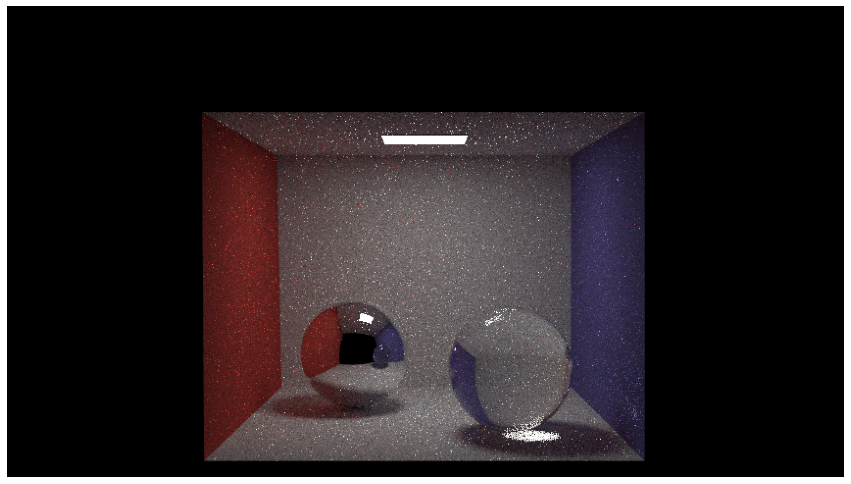

In [9]:
img = render(scene, 'pt',
    sampling_mode='mis',
    primary_ray_sampling_mode='image')
display_image(img)

### Light tracing

`renderer::lt`

[I|92.069] Loading asset [name='film']
[I|92.069] .. Asset [name='film'] has been already loaded. Replacing..
[I|92.082] Loading asset [name='renderer']
[I|92.082] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

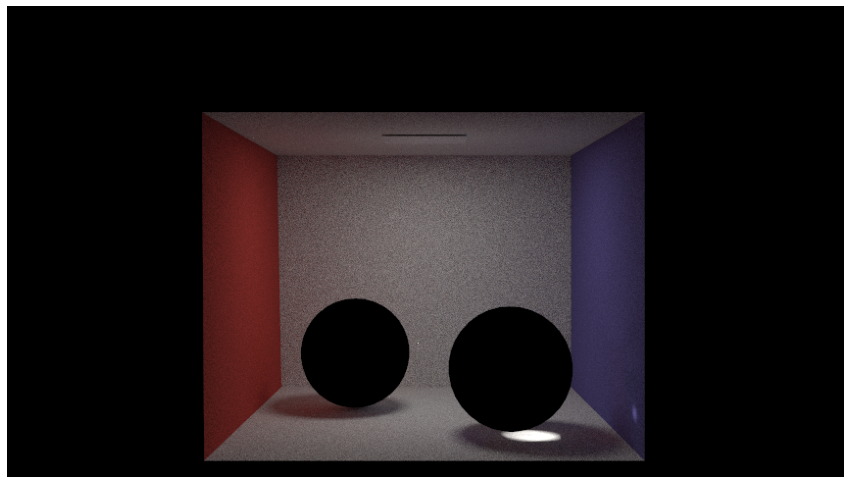

In [10]:
img = render(scene, 'lt')
display_image(img)

### Bidirectional path tracing

`renderer::bdpt` (unoptimized, bad absolute performance)

[I|122.794] Loading asset [name='film']
[I|122.794] .. Asset [name='film'] has been already loaded. Replacing..
[I|122.807] Loading asset [name='renderer']
[I|122.807] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

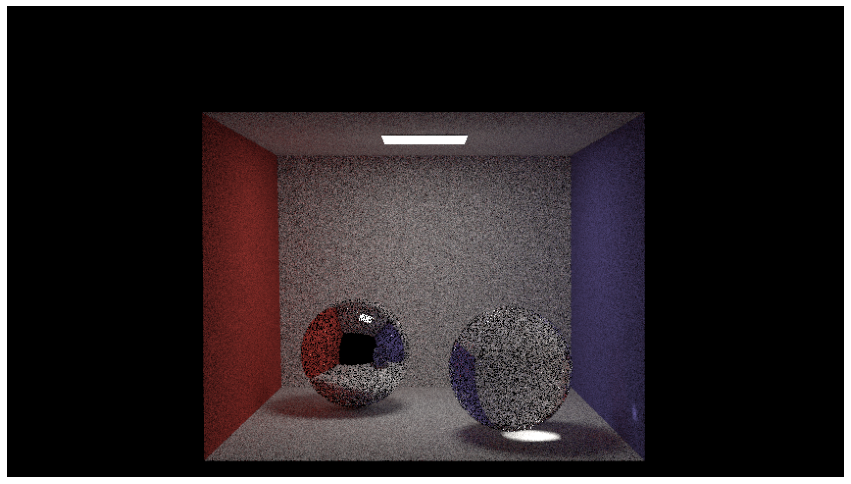

In [11]:
img = render(scene, 'bdpt')
display_image(img)

`renderer::bdptopt` (optimized)

[I|154.583] Loading asset [name='film']
[I|154.583] .. Asset [name='film'] has been already loaded. Replacing..
[I|154.596] Loading asset [name='renderer']
[I|154.596] .. Asset [name='renderer'] has been already loaded. Replacing..


  0%|          | 0/30.0 [00:00<?, ?it/s]

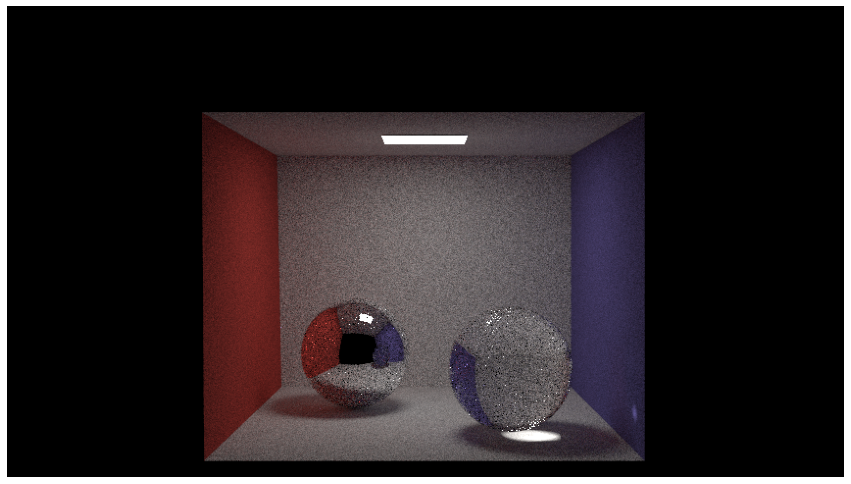

In [12]:
img = render(scene, 'bdptopt')
display_image(img)